### Exercise 1: Models implementation and testing (All Mandatory)

1. Implement all the methods in the abstract classes **KNNRegressionModel** and **KNNClassificationModel** in the MachineLearningModel.py file. 
As the names suggest, you must implement the Regression (slide 30) and Classification (slide 24) versions of the KNN algorithm and you must follow the algorithms stated in the slides. 
* Both models must use the Euclidean distance as the distance function (*Tip: Code smart by implementing an auxiliary method _euclidian_distance() in the MachineLearningModel.py file*).
* The evaluate() function for the **KNNRegressionModel** must implement the Mean Squared Error (MSE)
* The evaluate() function for the **KNNClassificationModel** must count the number of correct predictions.

2. Use the *Polynomial200.csv* dataset to show that all your methods for the **KNNRegressionModel** is working as expected. You must produce a similar figure to the one in slide 31. Instructions to produce the figure are present in the slide. You must show the effects of using k = 3, 5, 7 and 9 and discuss your findings on the figure produced.

**Discuss your findings for this question below**

With k = 3 the generated curve follows the noise in the data closely, it's overfitting and is more sensitive to individual points

When we increase the values to k = 5 and k = 7 the curve starts smoothing out and it starts to look like a good fit

With the value k = 9 the curve still fits well, but if we kept increaseing the value further (k = 11, k = 13,  etc.) the curve would eventually become too smooth and it would be underfitting


In [14]:
import numpy as np
import MachineLearningModel as mlm

data = np.genfromtxt('Polynomial200.csv', delimiter=',', skip_header=1)
X = data[:, 0]
y = data[:, 1]

x_plot = np.linspace(1,25,200)

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std
x_plot_norm = (x_plot - X_mean) / X_std

split_index = int(0.8 * len(X))
X_train = X[:split_index]
y_train = y[:split_index]
X_train_norm = X_norm[:split_index]

k_values = [3, 5, 7, 9]
predictions = {}
for k in k_values:
    model = mlm.KNNRegressionModel(k)
    model.fit(X_train_norm, y_train)
    y_pred = model.predict(x_plot_norm)
    predictions[k] = y_pred



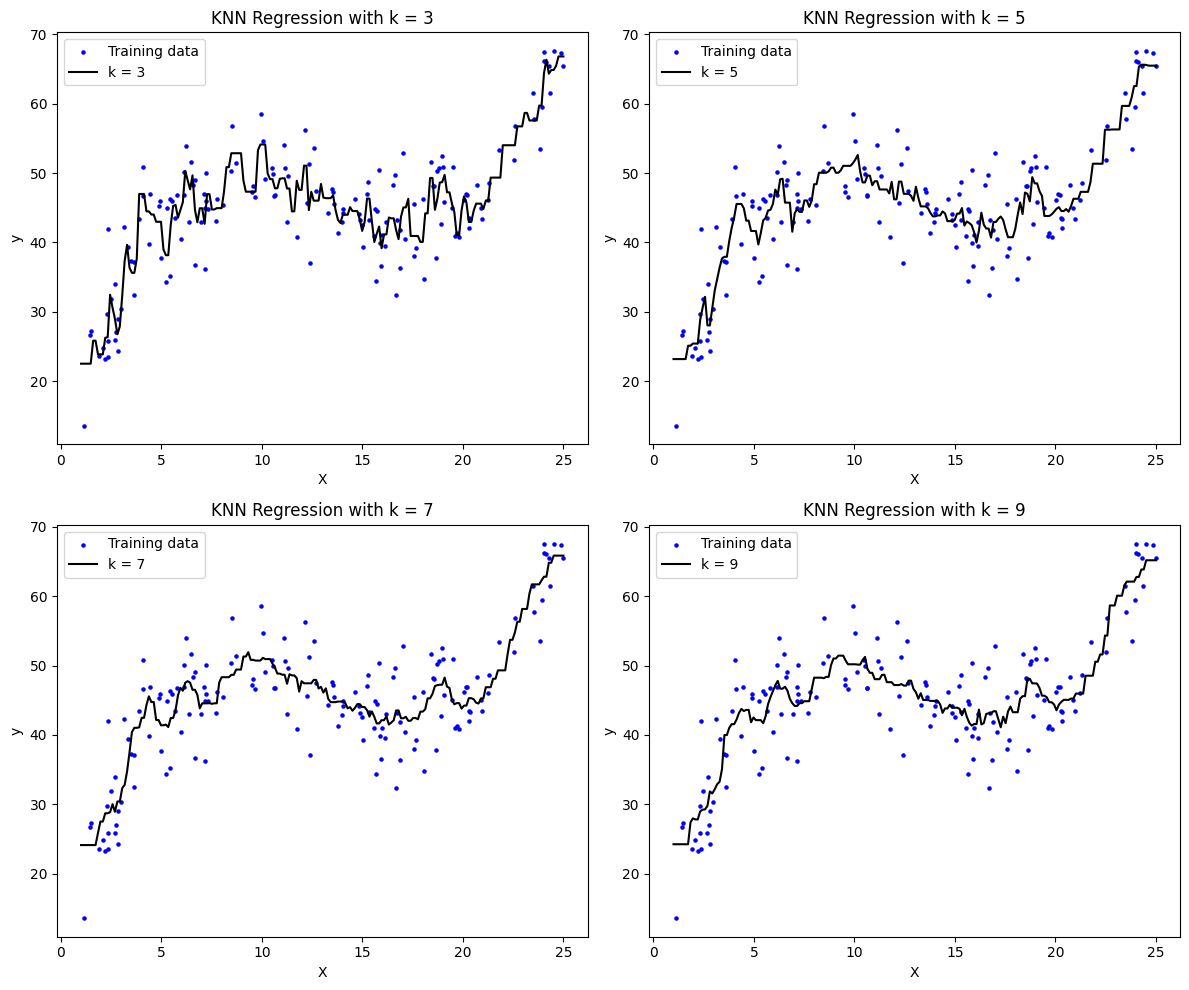

In [15]:
#  PLotting
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  

for i, k in enumerate(k_values):
    axes[i].scatter(X_train, y_train, color='blue', label='Training data', s=5)
    axes[i].plot(x_plot, predictions[k], color='black', label=f'k = {k}')
    axes[i].set_title(f'KNN Regression with k = {k}')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('y')
    axes[i].legend()

plt.tight_layout()
plt.show()


3. Use the *IrisDataset.csv* dataset to show that all your methods for the **KNNClassificationModel** is working as expected. You must produce a similar figure to the one in slide 28. Instructions on how to produce the figure are given in the slide. You must choose 2 input variables only to produce the figure (they do not need to match the figure in the slide). You must show the effects of using k = 3, 5, 7, and 9 and discuss the figure produced.

**Tips**

* Check the function *np.meshgrid* from numpy to create the samples.
* Check the function *plt.contourf* for generating the countours. 
* There are many tutorials online to produce this figure. Find one that most suits you.

**Discuss your findings for this question below**

With `k = 3` the countour apprears to be more jagged and follows the data closely, but this has the risk of overfitting
It's interesting to notice that visually this is the only value of `k` where there are no wrong colors in the wrong zones of the plot
 
As `k` increases the contour starts becoming smoother, the influence of individual data points on the contour becomes smaller and these calues should work better for predicting unseen data. The decision boundaries between the three iris species become more defined and stable

With `k = 9` and even bigger values of `k` the contour eventually becomes too smooth, which can lead to underfitting and potentially missing important boundaries if the separation between classes is complex. This is visible in how the decision boundary starts to drift away from the optimal separation observed in the actual data points

In [10]:
import numpy as np
import MachineLearningModel as mlm

data = np.genfromtxt('IrisDataset.csv', delimiter=',', skip_header=1, dtype=None, encoding='utf-8')

X = np.array([[row[0] * row[1], row[2] * row[3]] for row in data], dtype=float)  
y = np.array([row[4] for row in data])  

label_to_int = {}
int_to_label = {}
unique_labels = np.unique(y)

for i, label in enumerate(unique_labels):
    label_to_int[label] = i
    int_to_label[i] = label

y_encoded = np.array([label_to_int[label] for label in y])

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid_points = np.c_[xx.flatten(), yy.flatten()]

split_index = int(0.8 * len(X))
X_train = X[:split_index]
y_train = y_encoded[:split_index] 

X_train_norm = (X_train - X_mean) / X_std

grid_points_norm = (grid_points - X_mean) / X_std

k_values = [3, 5, 7, 9]
predictions = {}

for k in k_values:
    model = mlm.KNNClassificationModel(k)
    model.fit(X_train_norm, y_train)
    y_pred = model.predict(grid_points_norm).reshape(xx.shape)
    predictions[k] = y_pred


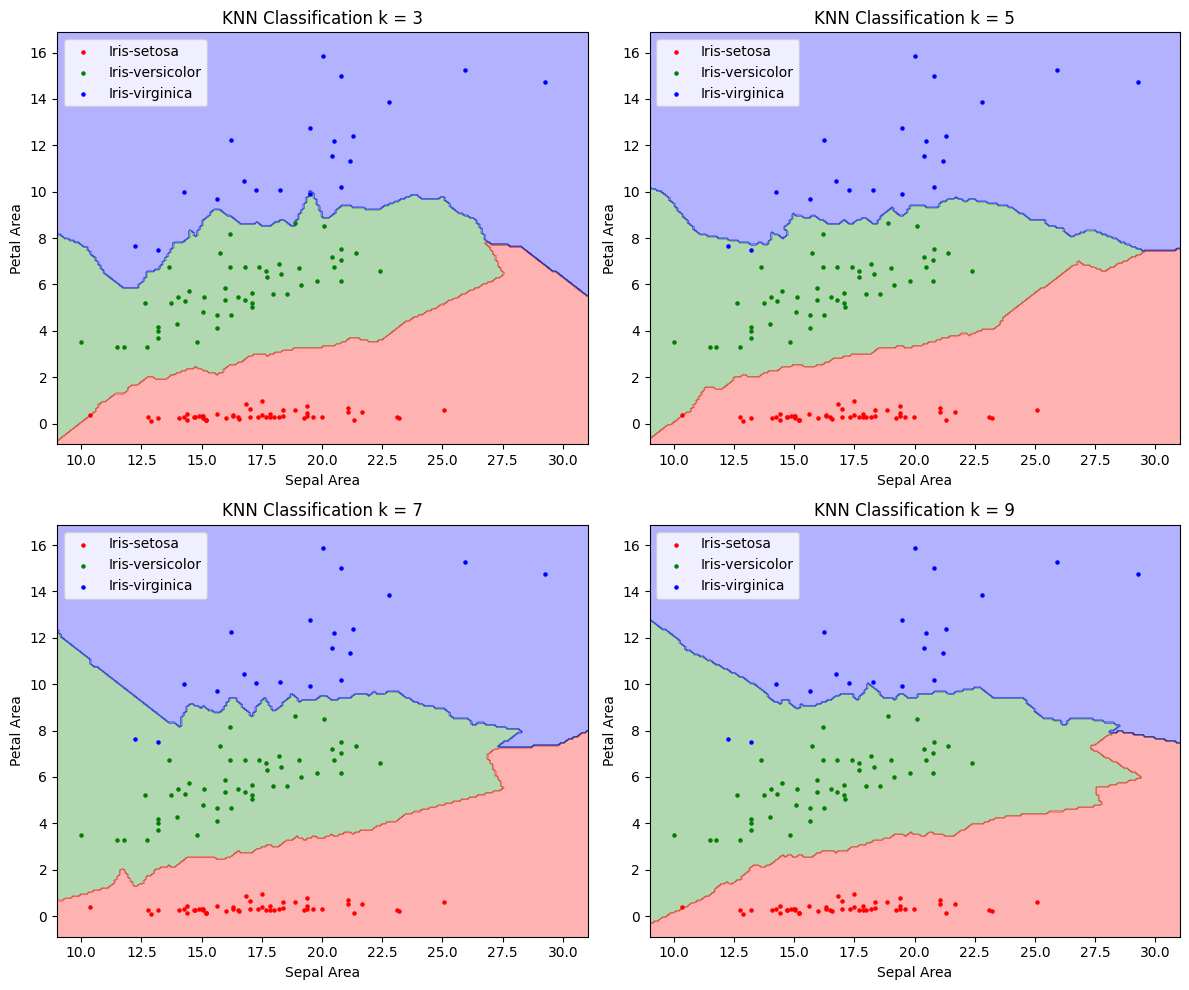

In [11]:
# PLotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
colors = ['red', 'green', 'blue']
custom_cmap = ListedColormap(colors[:len(unique_labels)])

for i, k in enumerate(k_values):
    axes[i].contourf(xx, yy, predictions[k], alpha=0.3, cmap=custom_cmap)
    
    for label in np.unique(y_train):
        axes[i].scatter(
            X_train[y_train == label, 0],
            X_train[y_train == label, 1],
            color=colors[label],
            label=f'{int_to_label[label]}',
            s=5
        )

    axes[i].set_title(f'KNN Classification k = {k}')
    axes[i].set_xlabel('Sepal Area')
    axes[i].set_ylabel('Petal Area')
    axes[i].legend()

plt.tight_layout()
plt.show()



### Exercise 2: KNN Regression (Mandatory)

1. (Mandatory) Create a procedure to repeat 10 times the following strategy.
* Use the values for k = 3, 5, 7, 9, 11, 13 and 15.
* Split your dataset randomly into 80% for training, and 20% testing. Use 10 different seeds for splitting the data.
* Evaluate (MSE implemented in your class) your **KNNRegressionModel** for each k in the **test set** and store the result. 
* Plot a barchart with these results.

Which k gives the best regression? Motivate your answer!

**Discuss your findings for this question below**

The MSE keeps decreasing as the `k` increases until it reaches 11. After that the MSE slightly increases when `k` reaches 13 and 15 (and it would have kept increasing if the procedure included further values of `k`, such as `k = 17`, `k = 19`, etc.). Smaller values of `k` are more sensitive to noise and larger values of `k` smooth the predicition too much. The best value for `k` seems to be 11 as it avoids both the noise of the smaller `k` values and the oversmoothing of larger `k` values

In [12]:
import MachineLearningModel as mlm
import numpy as np

base_seed = 865

data = np.genfromtxt('Polynomial200.csv', delimiter=',', skip_header=1)
X = data[:, 0]
y = data[:, 1]

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

k_values = [3, 5, 7, 9, 11, 13, 15]
total_runs = 10
results = {k: [] for k in k_values}

for run in range(total_runs):
    np.random.seed(base_seed + run)  

    indexes = np.random.permutation(len(X))

    split_index = int(0.8 * len(X))
    train_idx, test_idx = indexes[:split_index], indexes[split_index:]

    X_train, y_train = X_norm[train_idx], y[train_idx]
    X_test, y_test = X_norm[test_idx], y[test_idx]

    for k in k_values:
        model = mlm.KNNRegressionModel(k)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        
        mse = model.evaluate(y_test, y_pred)
        results[k].append(mse)

mean_mse = {k: np.mean(mse_list) for k, mse_list in results.items()}


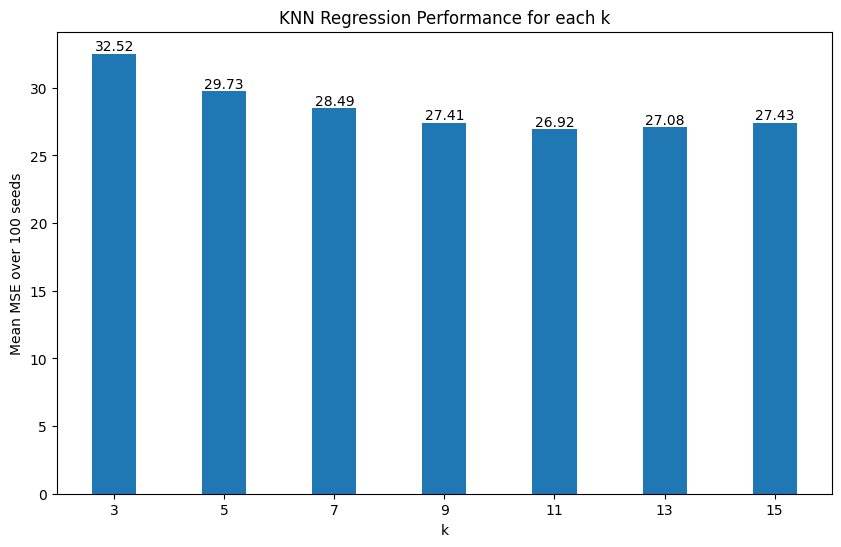

In [13]:
 # Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(mean_mse.keys(), mean_mse.values())
plt.xlabel('k')
plt.ylabel('Mean MSE over 100 seeds')
plt.title('KNN Regression Performance for each k')
plt.xticks(k_values)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                            
        f'{height:.2f}',                  
        ha='center',                      
        va='bottom'                        
    )

plt.show()

### Exercise 3: KNN Classification (1 Mandatory , 1 Non-Mandatory)

1. **(Mandatory)** Using the **IrisDataset.csv**, find the best combination of two features that produces the best model using **KNNClassificationModel**.
* You must try all combinations of two features, and for k = 3, 5, 7, and 9.
* You must use plots to support your answer.

**Discuss your findings for this question below**

I ran the model on all possible combinations with `k = 3, 5, 7, 9` a 100 times with random splits of the dataset for training and testing, and tracked the accuracy for each combination across all runs. After calculating the average accuracy for each feature pair and `k` value across all 100 runs, I found that the combination of PetalLengthCm and PetalWidthCm with `k = 5` achieved the highest overall accuracy of about `0.963`.

I created line plots showing the average performance of each feature combination at different k values, which clearly illustrates that moderate values of `k` (especially `k = 5`) often yield the best results, though this varies depending on the feature pair. For example, in the case of SepalLengthCm and PetalWidthCm, the highest accuracy is observed at `k = 3`, while SepalLengthCm and PetalLengthCm reaches its peak at `k = 9`.

This trend suggests that while smaller `k` values tend to work well for some combinations, the optimal `k` can differ depending on how distinct the clusters formed by the feature pairs are. It implies that the species are generally well separated in the Petal-based feature space, but not as distinctly in the Sepal-based feature space, where performance fluctuates more with varying `k`.

In [1]:
import MachineLearningModel as mlm
import numpy as np

base_seed = 865

data = np.genfromtxt('IrisDataset.csv', delimiter=',', dtype=None, encoding='utf-8')

names = data[0, :]

X = np.array(data[1:, 0:4], dtype=float)  
y = np.array(data[1:, 4]) 

label_to_int = {}
int_to_label = {}
unique_labels = np.unique(y)

for i, label in enumerate(unique_labels):
    label_to_int[label] = i
    int_to_label[i] = label

y_encoded = np.array([label_to_int[label] for label in y])

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

combinations = [
    (0, 1),  # sepal length, sepal width
    (0, 2),  # sepal length, petal length
    (0, 3),  # sepal length, petal width
    (1, 2),  # sepal width, petal length
    (1, 3),  # sepal width, petal width
    (2, 3)   # petal length, petal width
]
k_values = [3, 5, 7, 9]
best_combo_k_counter = {}
all_accuracies = {(i, j, k): [] for i, j in combinations for k in k_values}

total_runs = 100

for run in range(total_runs):
    np.random.seed(base_seed + run)  
    indexes = np.random.permutation(len(X))
    split_index = int(0.8 * len(X))
    train_idx, test_idx = indexes[:split_index], indexes[split_index:]
    X_train, y_train = X_norm[train_idx], y_encoded[train_idx]
    X_test, y_test = X_norm[test_idx], y_encoded[test_idx]

    best_result = {"accuracy": 0}

    for i, j in combinations:
        for k in k_values:
            model = mlm.KNNClassificationModel(k)
            model.fit(X_train[:, [i, j]], y_train)
            y_pred = model.predict(X_test[:, [i, j]])
            accuracy = model.evaluate(y_test, y_pred)
            all_accuracies[(i, j, k)].append(accuracy)

            if accuracy > best_result["accuracy"]:
                best_result = {
                    'k': k,
                    'accuracy': accuracy,
                    'combo': (str(names[i]), str(names[j]))
                }

    key = (best_result['combo'], best_result['k'])
    if key in best_combo_k_counter:
        best_combo_k_counter[key] += 1
    else:
        best_combo_k_counter[key] = 1

keys = list(best_combo_k_counter.keys())
values = list(best_combo_k_counter.values())

sorted_items = sorted(zip(keys, values), key=lambda x: x[1], reverse=True)
sorted_keys = [item[0] for item in sorted_items]
sorted_values = [item[1] for item in sorted_items]

avg_accuracies = {key: np.mean(values) for key, values in all_accuracies.items()}




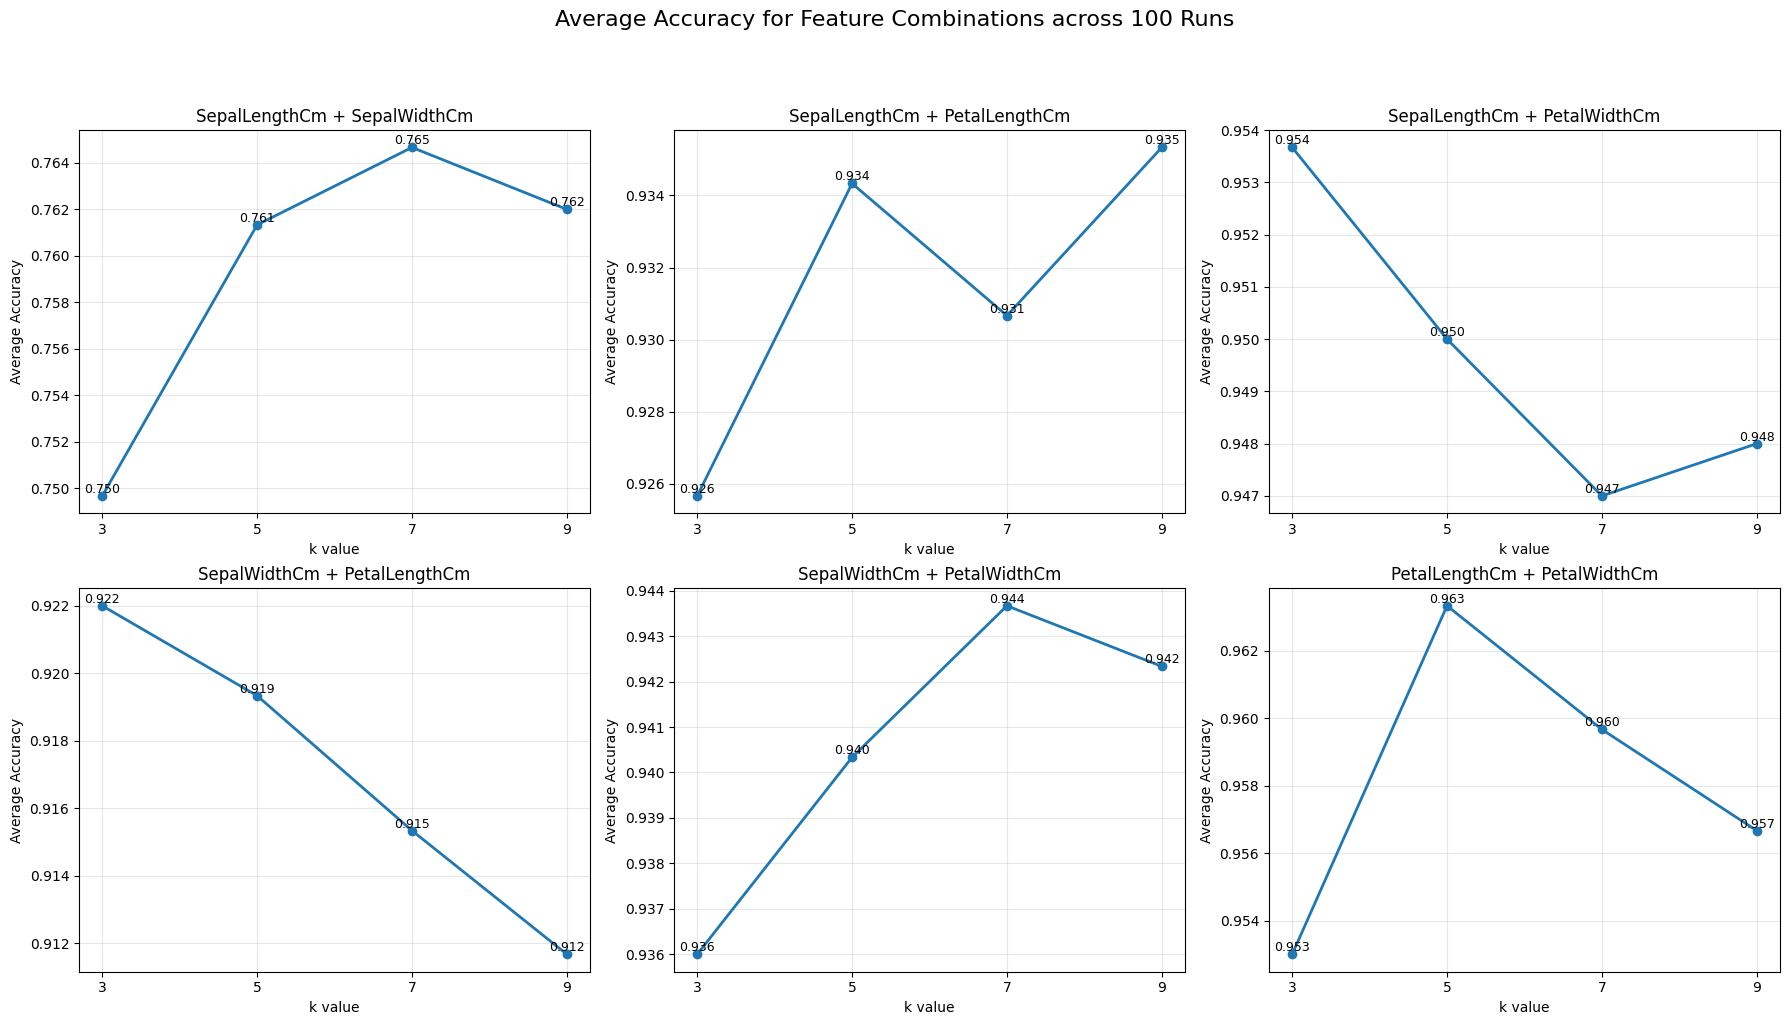

Best combination: PetalLengthCm + PetalWidthCm with k=5
Average accuracy: 0.963


In [ ]:
# Plotting
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

feature_names = [str(name) for name in names[:4]]

for idx, (i, j) in enumerate(combinations):
    ax = axes[idx]
    x = k_values
    y = [avg_accuracies[(i, j, k)] for k in k_values]
    
    ax.plot(x, y, 'o-', linewidth=2)
    ax.set_title(f'{feature_names[i]} + {feature_names[j]}', fontsize=12)
    ax.set_xlabel('k value', fontsize=10)
    ax.set_ylabel('Average Accuracy', fontsize=10)
    ax.set_xticks(k_values)
    ax.grid(True, alpha=0.3)
    
    for k_idx, k in enumerate(k_values):
        ax.text(k, y[k_idx], f'{y[k_idx]:.3f}', 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('Average Accuracy for Feature Combinations across 100 Runs', fontsize=16, y=1.02)
plt.subplots_adjust(top=0.9)
plt.show()

best_combo_key = max(avg_accuracies.items(), key=lambda x: x[1])
i, j, k = best_combo_key[0] 
print(f"Best combination: {feature_names[i]} + {feature_names[j]} with k={k}")
print(f"Average accuracy: {best_combo_key[1]:.3f}")

2. **(Non-mandatory)** Implement a new Class called **FastKNNClassificationModel**. This method should be faster than your regular implementation. This can be done by using a faster data structure to look for the closest neighbors faster. In this assignment, you must build the KDTree with the the training data and then search for the neighbors using it.

* You must use this implementation of KDTree from Scipy. https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html
* The methods needed for your implementation are only the *constructor* (to build the KDTree) and the method *query* to find the k-neighbors.
* You must design an experiment using the **IrisDataset.csv** with **all features** to show that your new implementation is faster than your implementation of **KNNClassificationModel**.
* For example, you can measure the time using of each prediction, for each classifier, and plot the average time to give a decision for entries. Also, measure how this would increase/decrease with the increment of the input parameter *k*. 
* Use a plot(s) from matplotlib to support your answer.

**Discuss your findings for this question below**

I ran both the regular KNN Classification Model and the Fast Classification Model on the same exact training and testing data and calculated how long it takes on average per sample to predict the value. I did this for various values of `k` and plotted all the results. From the plot, it is clear that the Fast Classification Model is consistently and significantly faster than the regular one across all values of `k`. The average prediction time for the Fast model is much lower, with minimal variation, while the standard KNN shows both higher average times and greater variance. This is expected since the Fast Classification Model uses a KDTree, and the complexity of the prediction function with KDTree is logarithmic, while the one without KDTree is linear. Because the dataset is relatively small, increasing `k` doesn't have a major impact on the prediction times for either model. However, the efficiency gain of using KDTree is still clearly visible

In [2]:
import MachineLearningModel as mlm
import numpy as np
import time

base_seed = 865

data = np.genfromtxt('IrisDataset.csv', delimiter=',', dtype=None, encoding='utf-8')

names = data[0, :]

X = np.array(data[1:, 0:4], dtype=float)  
y = np.array(data[:, 4]) 

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

k_values = list(range(3, 32, 2))
total_runs = 100
np.random.seed(base_seed)

total_runs = 100

slow_times = {k: [] for k in k_values}
fast_times = {k: [] for k in k_values}

for run in range(total_runs):
    np.random.seed(base_seed + run)  
    indexes = np.random.permutation(len(X))
    split_index = int(0.8 * len(X))
    train_idx, test_idx = indexes[:split_index], indexes[split_index:]
    X_train, y_train = X_norm[train_idx], y[train_idx]
    X_test, y_test = X_norm[test_idx], y[test_idx]

    for k in k_values:
        slow_model = mlm.KNNClassificationModel(k)
        slow_model.fit(X_train, y_train)
        slow_start = time.time()
        _ = slow_model.predict(X_test)
        slow_end = time.time()
        slow_times[k].append((slow_end - slow_start) / len(X_test))

        fast_model = mlm.FastKNNClassificationModel(k)
        fast_model.fit(X_train, y_train)
        fast_start = time.time()
        _ = fast_model.predict(X_test)
        fast_end = time.time()
        fast_times[k].append((fast_end - fast_start) / len(X_test))
    

slow_avg_times = [np.mean(slow_times[k]) for k in k_values]
fast_avg_times = [np.mean(fast_times[k]) for k in k_values]
slow_std_times = [np.std(slow_times[k]) for k in k_values]
fast_std_times = [np.std(fast_times[k]) for k in k_values]


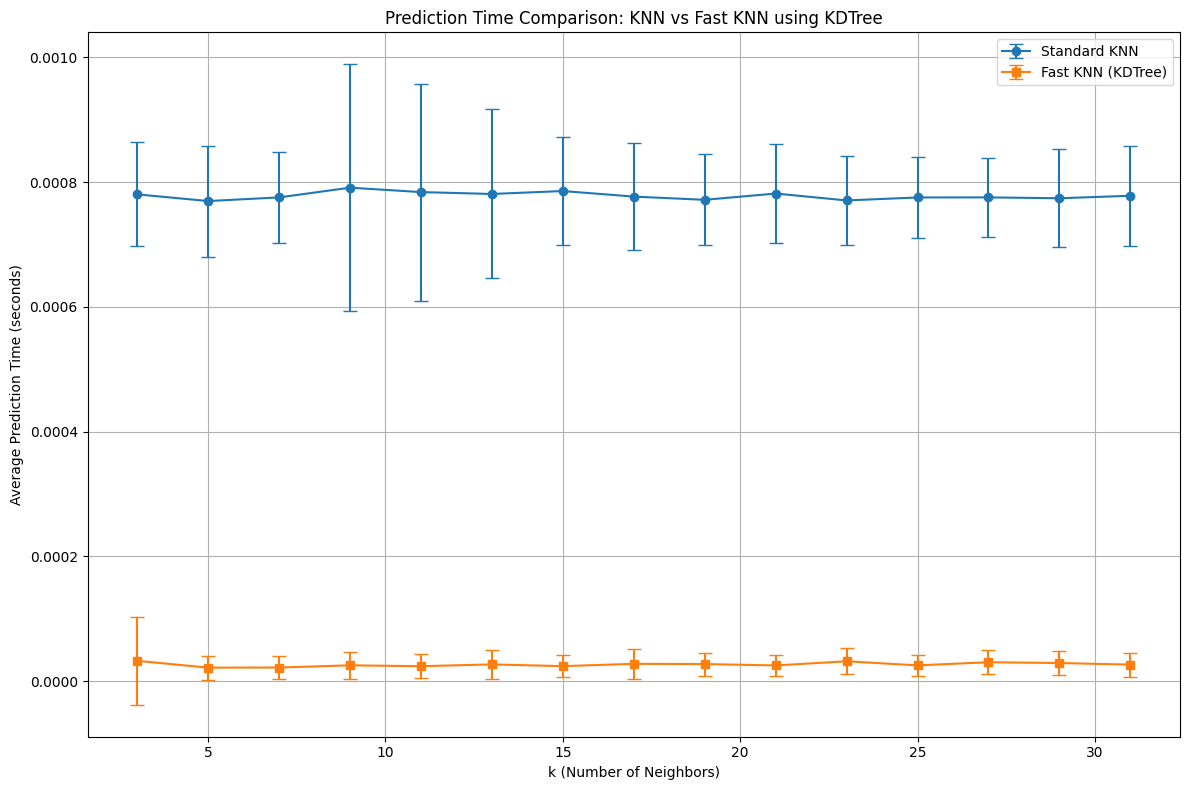

In [3]:
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.errorbar(k_values, slow_avg_times, yerr=slow_std_times, 
             fmt='o-', label="Standard KNN", capsize=5)
plt.errorbar(k_values, fast_avg_times, yerr=fast_std_times, 
             fmt='s-', label="Fast KNN (KDTree)", capsize=5)

plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Average Prediction Time (seconds)")
plt.title("Prediction Time Comparison: KNN vs Fast KNN using KDTree")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Exercise 4: MNIST k-NN classification (Non-mandatory)

In this final exercise, we will use k-NN for classifying handwritten digits using the very famous MNIST dataset. Input to the algorithm is an image (28x28 pixel) with a handwritten digit (0-9) and the output should be a classification 0-9. The dataset and a description of it is available at http://yann.lecun.com/exdb/mnist/. Google MNIST Python to learn how to access it. The objective is to use your k-NN classifier to perform as good as possible on recognizing handwritten images. Describe your effort and what you found out to be the best k to lower the test error. The complete dataset has 60,000 digits for training and 10,000 digits for testing. Hence the computations might be heavy, so start of by a smaller subset rather than using the entire dataset. The final testing should (if possible) be done for the full test set but we will accept solutions that use "only" 10,000 digits for training and 1,000 digits for testing.
The description of this exercise is deliberately vague as you are supposed to, on your own, find a suitable way to solve this problem in detail. This is why it is important that you document your effort and progress in your report. **You must use your implementations of KNN for classification. If you successfully finished Exercise 3, part 2, it is advisable to use your FastKNNClassificationModel**

For this task I chose to download the ready made csv file of the MNIST dataset, and not to convert the images to csv myself. I didn't use the whole dataset but I used `10000` samples for training and `1000` samples for testing. After that I ran the FastKNNClassification Model on the data from the csv file. I chose to plot both the overall accuracy of the model for various values of `k` and the accuracy of the model per digit 

By looking at the accuracy per digit plot we can see several things
* Digit 0 and 1 achieved perfect or near-perfect accuracy (100%) across all `k` values — these digits are likely easier to distinguish due to their unique shapes
* Digit 6 maintains accuracy above 94%, peaking at 97% for k=3
* Digit 2 consistently had the lowest accuracy, dropping as low as 73%, with a steady decrease as k increases. This suggests that digit 2 might share visual features with other digits (e.g., 3, 5, 8), making it prone to misclassification
* Digit 8 also performed worse compared to others, likely due to its similarity with 0, 3, and 9
* Accuracy tends to slightly decrease for most digits as `k` increases — a known behavior of k-NN, where a too-large `k` causes over-smoothing
* Digits 1, 3, 4, 5, 7, 8, 9 perform relatievely well for the `k` values I used, their accuracy doesn't drop below 90%

By looking at the overall accuracy plot we can see
* The highest overall accuracy is achieved at k = 3 with accuracy 91.1%
* Accuracy drops gradually with increasing k, reaching 89.6% at k = 31
* The accuracy becomes worse as `k` becomes bigger which leads to underfitting

In [19]:
import numpy as np
import MachineLearningModel as mlm


train_data = np.genfromtxt('MNIST_CSV\mnist_train.csv', delimiter=',')
test_data = np.genfromtxt('MNIST_CSV\mnist_test.csv', delimiter=',')

X_train = train_data[:, 1:] / 255.0
y_train = train_data[:, 0]

X_test = test_data[:, 1:] / 255.0
y_test = test_data[:, 0]


X_train_small = X_train[:10000]
y_train_small = y_train[:10000]
X_test_small = X_test[:1000]
y_test_small = y_test[:1000]

k_values = list(range(3, 32, 2))
digit_accuracies = np.zeros((10, len(k_values)))
overall_accuracies = np.zeros(len(k_values))

for k_idx, k in enumerate(k_values):
    model = mlm.FastKNNClassificationModel(k)
    model.fit(X_train_small, y_train_small)
    y_pred = model.predict(X_test_small)

    overall_accuracies[k_idx] = model.evaluate(y_test_small, y_pred)
    
    for digit in range(10):
        digit_indices = np.where(y_test_small == digit)[0]
        if len(digit_indices) > 0:
            digit_correct = np.sum(y_pred[digit_indices] == y_test_small[digit_indices])
            digit_accuracies[digit, k_idx] = digit_correct / len(digit_indices)


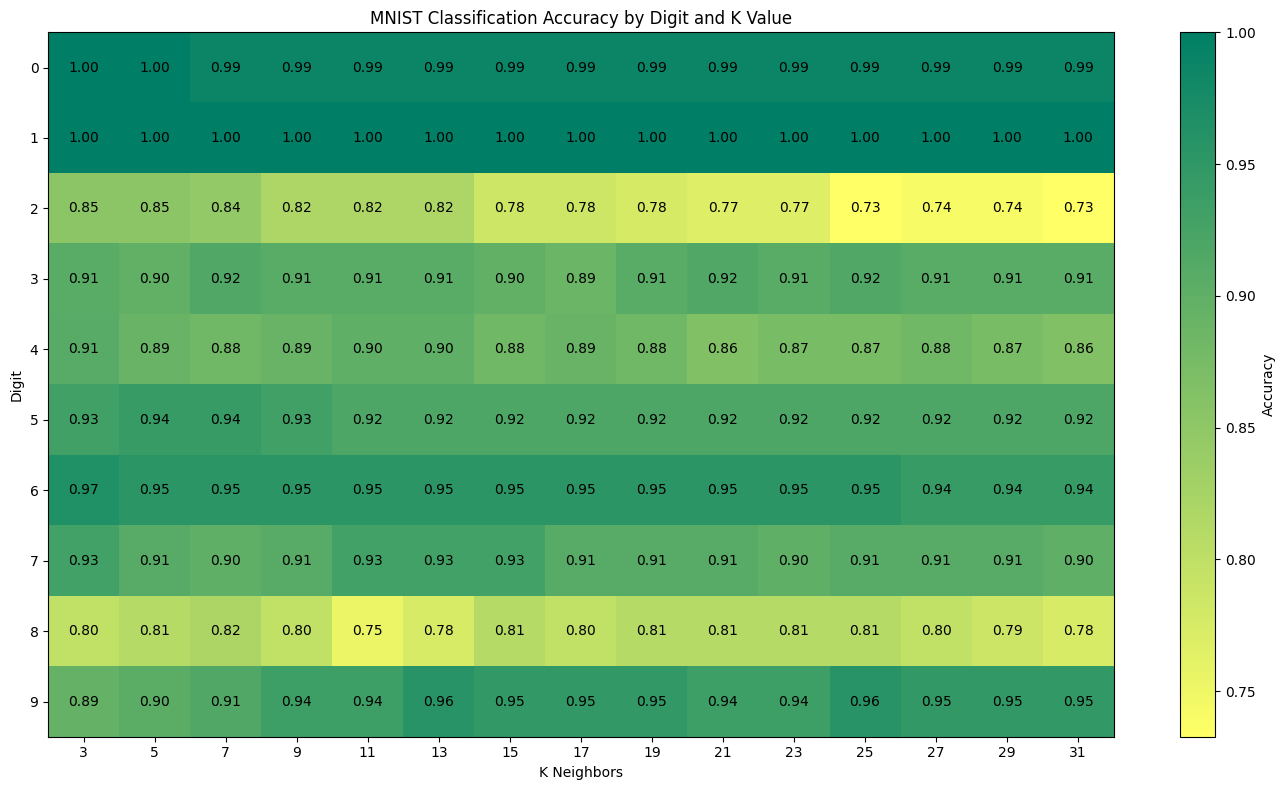

In [20]:
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
im = plt.imshow(digit_accuracies, cmap=plt.cm.summer_r, aspect='auto')
plt.colorbar(im, label='Accuracy')

plt.yticks(range(10), range(10))
plt.xticks(range(len(k_values)), k_values)
plt.xlabel('K Neighbors')
plt.ylabel('Digit')
plt.title('MNIST Classification Accuracy by Digit and K Value')

for i in range(10):
    for j in range(len(k_values)):
        plt.text(j, i, f'{digit_accuracies[i, j]:.2f}', 
                 ha='center', va='center', 
                 color='black')

plt.tight_layout()
plt.show()


Best k value: 3 with accuracy: 0.9190


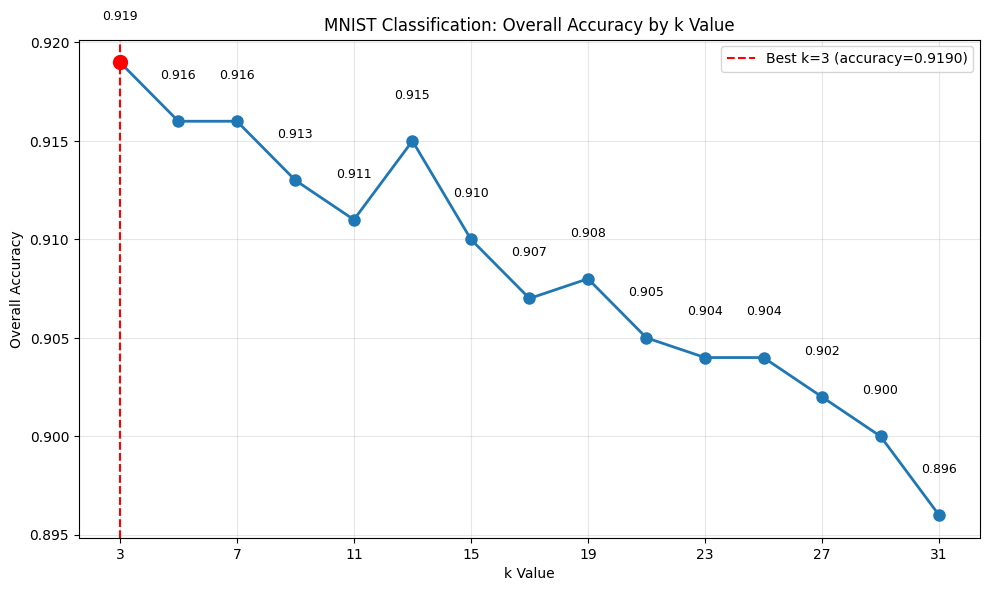

In [21]:
best_k_idx = np.argmax(overall_accuracies)
best_k = k_values[best_k_idx]
print(f"Best k value: {best_k} with accuracy: {overall_accuracies[best_k_idx]:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, overall_accuracies, 'o-', linewidth=2, markersize=8)
plt.axvline(x=best_k, color='r', linestyle='--', 
            label=f'Best k={best_k} (accuracy={overall_accuracies[best_k_idx]:.4f})')

plt.xlabel('k Value')
plt.ylabel('Overall Accuracy')
plt.title('MNIST Classification: Overall Accuracy by k Value')
plt.grid(True, alpha=0.3)
plt.xticks(k_values[::2])  # Show every other k value to avoid crowding

# Annotate best point
plt.plot(best_k, overall_accuracies[best_k_idx], 'ro', markersize=10)

# Add value annotations
for k_idx, k in enumerate(k_values):
    plt.text(k, overall_accuracies[k_idx] + 0.002, f'{overall_accuracies[k_idx]:.3f}', 
             ha='center', va='bottom', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()